### Cyber Bullying Prediction using Natural Language Processing and Machine Learning

Author: Zak Davlin


In [14]:
#Import needed modules
import pandas as pd
import numpy as np
import csv
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

In [2]:
#Read in CSV file
CB=pd.read_csv("cyberbullying_tweets[1].csv", sep=",")
#First 5 rows
CB.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
#How much data do we have?
print(len(CB), "rows in the dataset.")
CB.cyberbullying_type.value_counts()

47692 rows in the dataset.


religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [4]:
CB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [5]:
#Add a column to clean text
CB['Clean_Text'] = CB.loc[:,'tweet_text']
CB.head(5)

,tweet_text,cyberbullying_type,Clean_Text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,@XochitlSuckkks a classy whore? Or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"@Jason_Gio meh. :P thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,@RudhoeEnglish This is an ISIS account pretend...


In [6]:
#Clean Text in the clean text column
#Remove duplicates if any
CB.drop_duplicates(subset=['tweet_text'])
#Replace popular abbreviations
CB["Clean_Text"] = CB["Clean_Text"].str.replace(" r "," are ")
CB["Clean_Text"] = CB["Clean_Text"].str.replace(" n "," in ")
CB["Clean_Text"] = CB["Clean_Text"].str.replace(" ur "," you're ")
CB["Clean_Text"] = CB["Clean_Text"].str.replace(" u "," you ")
CB["Clean_Text"] = CB["Clean_Text"].str.replace("#","")
#Create a function to remove all @name as they do not pertain to the statements and are random user names

def Tweet_username_removal(x):
    x=x.split()
    x_new=[x for x in x if not x.startswith("@")]
    return ' '.join(x_new)
CB["Clean_Text"] = CB["Clean_Text"].apply(Tweet_username_removal)
print(CB.head(5))
print(CB.info())

                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                          Clean_Text  
0  In other words katandandre, your food was crap...  
1  Why is aussietv so white? MKR theblock ImACele...  
2       a classy whore? Or more red velvet cupcakes?  
3  meh. :P thanks for the heads up, but not too c...  
4  This is an ISIS account pretending to be a Kur...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text

Looks like we have no duplicates!

In [17]:
#Use text blob to add sentiment analysis 
from textblob import TextBlob
polarity_Subjectivity_scores=[]
#add blank columns to CB data frame
for text in CB['Clean_Text']:
    analysis = TextBlob(text)
    polarity_Subjectivity_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))
SentimentDF=pd.DataFrame(polarity_Subjectivity_scores, columns=['Polarity','Subjectivity'])

In [18]:
CBFD=pd.merge(CB, SentimentDF,left_index=True, right_index=True)
CBFD.head(5)

,tweet_text,cyberbullying_type,Clean_Text,Polarity,Subjectivity
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"In other words katandandre, your food was crap...",-0.15625,0.375000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is aussietv so white? MKR theblock ImACele...,0.00000,0.000000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,a classy whore? Or more red velvet cupcakes?,0.20000,0.466667
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"meh. :P thanks for the heads up, but not too c...",0.15000,0.733333
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This is an ISIS account pretending to be a Kur...,0.00000,0.000000


In [19]:
CBFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_text          47692 non-null  object 
 1   cyberbullying_type  47692 non-null  object 
 2   Clean_Text          47692 non-null  object 
 3   Polarity            47692 non-null  float64
 4   Subjectivity        47692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.8+ MB


In [20]:
CBFD.describe()

,Polarity,Subjectivity
count,47692.000000,47692.000000
mean,-0.027008,0.459429
std,0.324468,0.287653
min,-1.000000,0.000000
25%,-0.191667,0.267857
50%,0.000000,0.500000
75%,0.158417,0.650000
max,1.000000,1.000000


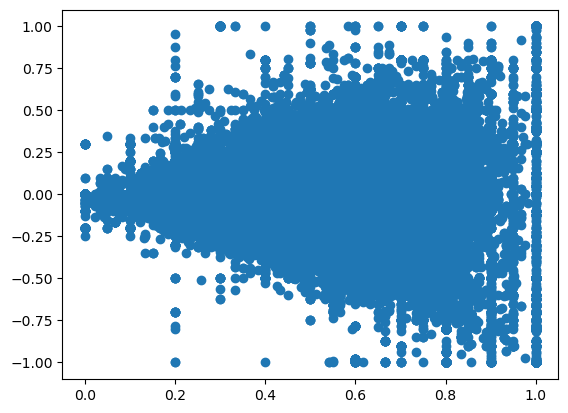

In [24]:
plt.scatter(CBFD['Subjectivity'],CBFD['Polarity'])

(array([  631.,  1987.,  2895.,  6230.,  7368., 19204.,  5373.,  2911.,
          575.,   518.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

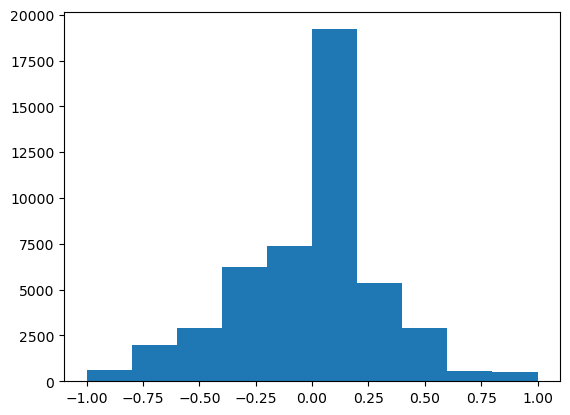

In [25]:
plt.hist(CBFD['Polarity'])

(array([ 8806.,  1362.,  2937.,  3970.,  5174., 10795.,  5591.,  3307.,
         2308.,  3442.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

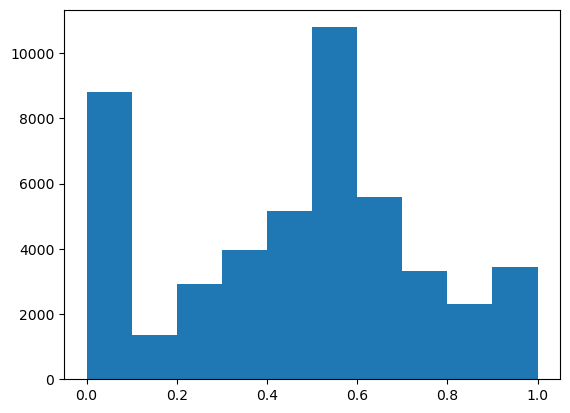

In [27]:
plt.hist(CBFD['Subjectivity'])

(array([  528.,  1756.,  2576.,  5762.,  6743., 14799.,  4603.,  2295.,
          378.,   307.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

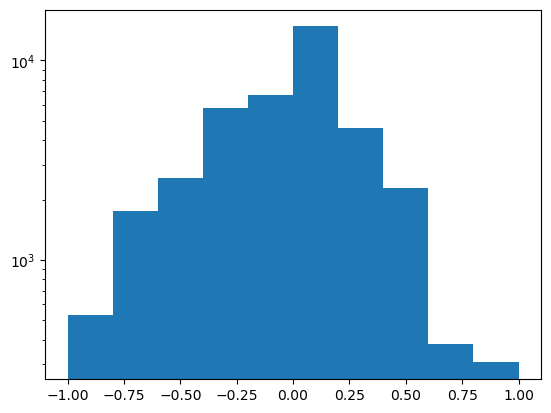

In [29]:
CBFDFilter = CBFD[CBFD['cyberbullying_type']!='not_cyberbullying']
plt.hist(CBFDFilter['Polarity'])

(array([  528.,  1756.,  2576.,  5762.,  6743., 14799.,  4603.,  2295.,
          378.,   307.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

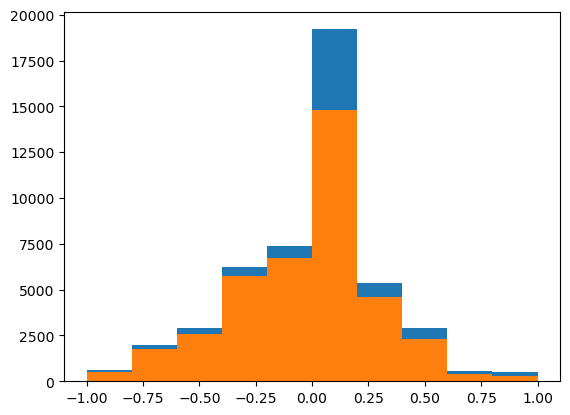

In [33]:
plt.hist(CBFD['Polarity'])
plt.hist(CBFDFilter['Polarity'])

(array([5593., 1110., 2468., 3623., 4715., 9838., 4954., 2991., 1954.,
        2501.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

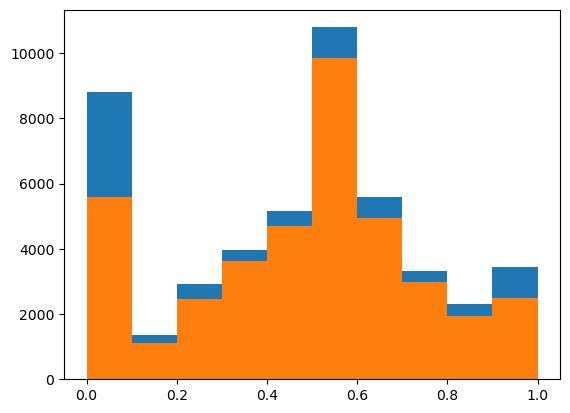

In [34]:
plt.hist(CBFD['Subjectivity'])
plt.hist(CBFDFilter['Subjectivity'])